<a href="https://colab.research.google.com/github/Tumars-web/E-commerce-user-growth-analysis/blob/main/notebooks/04_%E7%94%A8%E6%88%B7%E6%96%B0%E5%A2%9E%E4%B8%8E%E6%BF%80%E6%B4%BB%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import zipfile
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://github.com/Tumars-web/E-commerce-user-growth-analysis/raw/main/cleaned_data.csv.zip'
zip_path = 'cleaned_data.zip'

# 下载压缩包
urllib.request.urlretrieve(url, zip_path)

# 解压缩
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# 读取 CSV
df = pd.read_csv('cleaned_data.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print("数据加载成功！")
df.head()


数据加载成功！


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


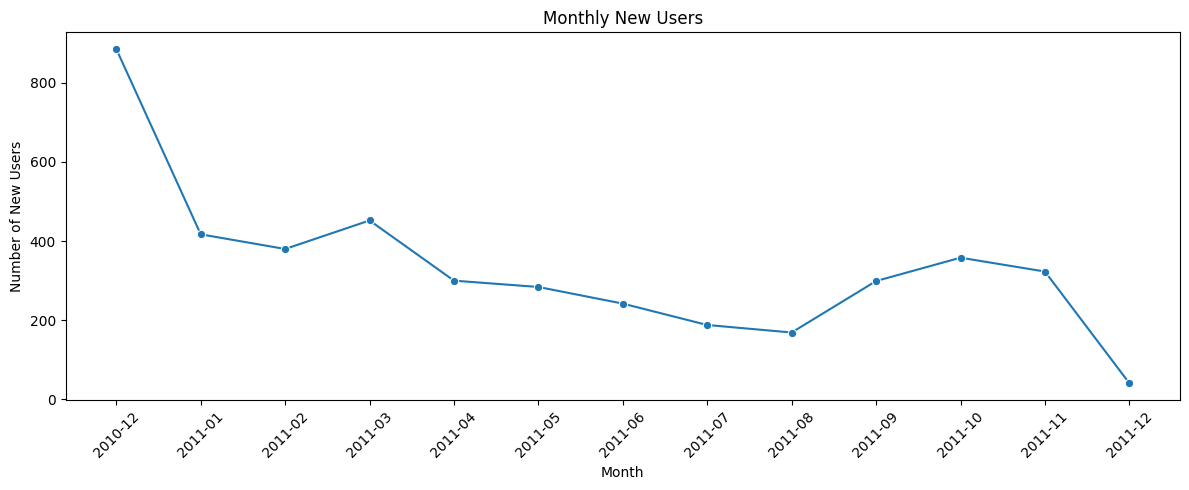

In [6]:
#分析目标
#衡量拉新效果：统计平台每月每日新增用户数/评估拉新趋势与波动（是否稳定增长）/监控市场活动或渠道变化对新增的影响

import pandas as pd

# 假设你是读取本地数据
df = pd.read_csv('cleaned_data.csv', encoding='ISO-8859-1', parse_dates=['InvoiceDate'])

# 每个用户的首次下单日期（即注册日期）
user_first_order = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
user_first_order.columns = ['CustomerID', 'FirstOrderDate']

# 按月统计新增用户数
user_first_order['FirstOrderMonth'] = user_first_order['FirstOrderDate'].dt.to_period('M').astype(str)
monthly_new_users = user_first_order.groupby('FirstOrderMonth')['CustomerID'].nunique().reset_index()
monthly_new_users.columns = ['Month', 'NewUsers']

# 画新增用户趋势
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_new_users, x='Month', y='NewUsers', marker='o')
plt.title('Monthly New Users')
plt.xlabel('Month')
plt.ylabel('Number of New Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


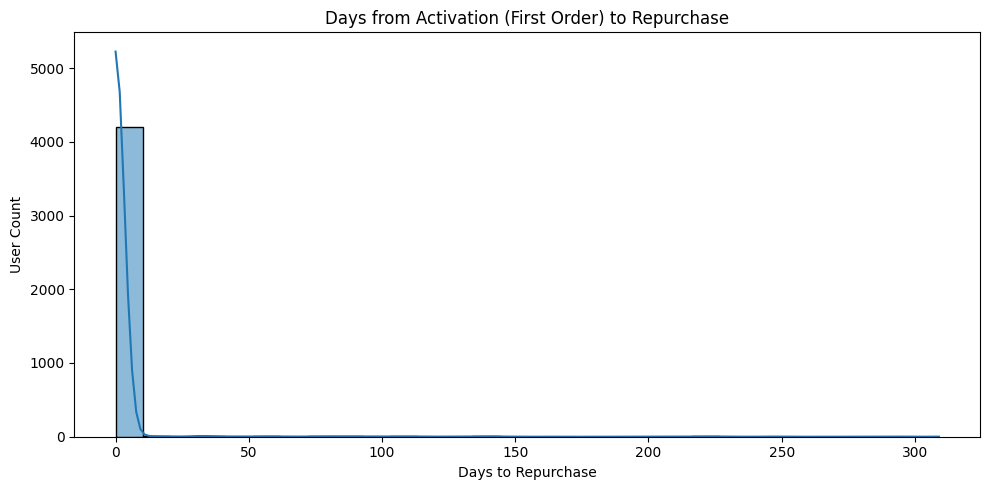

In [9]:
# 获取每个用户的首次订单日期（视为激活时间）
user_first_order = df.groupby('CustomerID')['InvoiceDate'].min().reset_index()
user_first_order.columns = ['CustomerID', 'FirstOrderDate']

# 获取每个用户的第二次订单日期（用于激活后行为分析）
user_orders = df.sort_values(['CustomerID', 'InvoiceDate'])
user_orders['OrderRank'] = user_orders.groupby('CustomerID')['InvoiceDate'].rank(method='first')

second_orders = user_orders[user_orders['OrderRank'] == 2][['CustomerID', 'InvoiceDate']]
second_orders.columns = ['CustomerID', 'SecondOrderDate']

# 合并首单和第二单
activation_df = pd.merge(user_first_order, second_orders, on='CustomerID', how='left')

# 计算激活后 复购间隔（首单到第二单）
activation_df['DaysToRepurchase'] = (activation_df['SecondOrderDate'] - activation_df['FirstOrderDate']).dt.days

# 可视化首单后复购间隔分布
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(activation_df['DaysToRepurchase'].dropna(), bins=30, kde=True)
plt.title('Days from Activation (First Order) to Repurchase')
plt.xlabel('Days to Repurchase')
plt.ylabel('User Count')
plt.tight_layout()
plt.show()
